In [1]:
import cv2
import skimage
import matplotlib.pyplot as plt
import numpy as np
import os
import random



In [2]:
root_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_root'
seed_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_seed'
shoot_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task4\predicted_masks\predicted_masks_shoot'

output_directory = r'C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all'

# Function to combine masks pairwise from each directory and save the results
def combine_pairwise_masks(root_dir, seed_dir, shoot_dir, output_dir):
    root_files = os.listdir(root_dir)
    seed_files = os.listdir(seed_dir)
    shoot_files = os.listdir(shoot_dir)

    num_masks = min(len(root_files), len(seed_files), len(shoot_files))

    for i in range(num_masks):
        root_mask = cv2.imread(os.path.join(root_dir, root_files[i]), cv2.IMREAD_GRAYSCALE)
        seed_mask = cv2.imread(os.path.join(seed_dir, seed_files[i]), cv2.IMREAD_GRAYSCALE)
        shoot_mask = cv2.imread(os.path.join(shoot_dir, shoot_files[i]), cv2.IMREAD_GRAYSCALE)

        combined_mask = cv2.bitwise_or(root_mask, seed_mask)
        combined_mask = cv2.bitwise_or(combined_mask, shoot_mask)

        cv2.imwrite(os.path.join(output_dir, f'combined_mask_{i}.png'), combined_mask)

# Combine masks pairwise from each directory
combine_pairwise_masks(root_directory, seed_directory, shoot_directory, output_directory)


## Example semantic segmentation mask

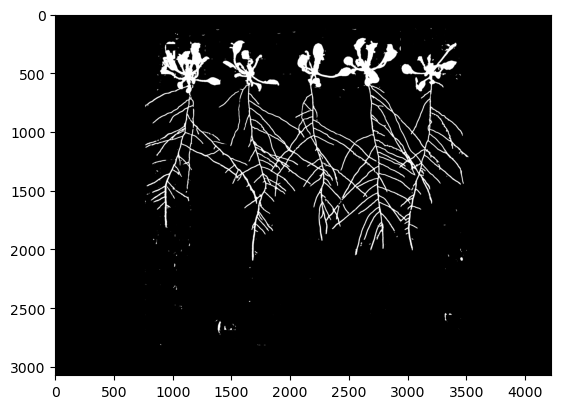

In [3]:

combined_mask = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_2.png", cv2.IMREAD_GRAYSCALE)

_, thresholded = cv2.threshold(combined_mask, 10, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded, cmap='gray')

##  Instance segmentation mask

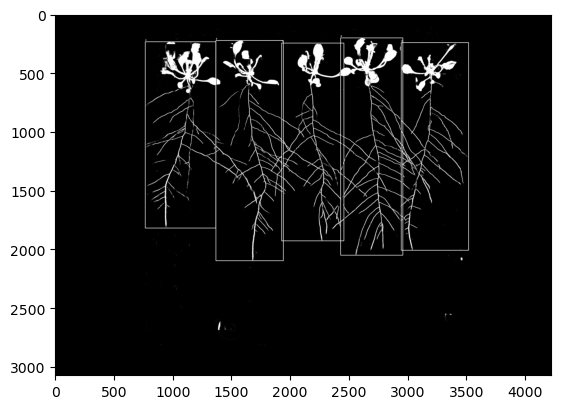

In [4]:
def visualize_detected_instances(mask_path):
    combined_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    cv2.line(combined_mask, (1377, 0), (1350, combined_mask.shape[0]), (0, 0, 0), thickness=5)
    cv2.line(combined_mask, (1895, 0), (2000, combined_mask.shape[0]), (0, 0, 0), thickness=5)
    cv2.line(combined_mask, (2415, 0), (2500, combined_mask.shape[0]), (0, 0, 0), thickness=5)
    cv2.line(combined_mask, (2920, 0), (3000, combined_mask.shape[0]), (0, 0, 0), thickness=5)

   
    _, thresholded = cv2.threshold(combined_mask, 5, 255, cv2.THRESH_BINARY)

    
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    morphed = cv2.morphologyEx(morphed, cv2.MORPH_OPEN, kernel)

    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > 3000]

    contours_to_use = sorted(filtered_contours, key=cv2.contourArea, reverse=True)[:len(filtered_contours)]

    instance_id = 0
    for contour in contours_to_use:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(combined_mask, str(instance_id), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        cv2.rectangle(combined_mask, (x, y), (x + w, y + h), (255, 255, 255), 3)  
        instance_id += 1


    plt.imshow(combined_mask, cmap='gray')
    plt.show()

mask_path = r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all\combined_mask_2.png"
visualize_detected_instances(mask_path)


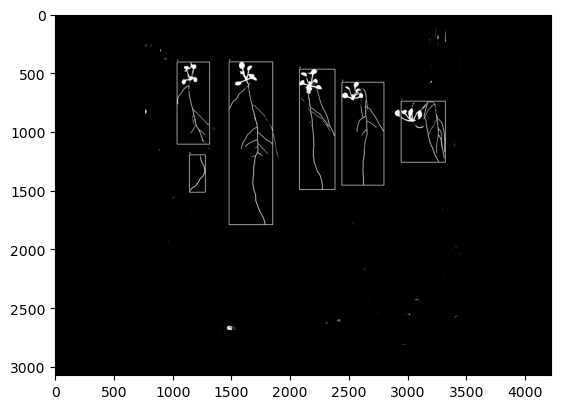

In [39]:
def visualize_random_instance():
    masks_folder = r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task5\predicted_masks_all"
    masks = os.listdir(masks_folder)

    random_mask = random.choice(masks)
    mask_path = os.path.join(masks_folder, random_mask)

    visualize_detected_instances(mask_path)

visualize_random_instance()
